#**Parcial 2**
**Nombre** : Jerónimo López Gómez

**C.C.** : 1.001.735.333


### Link a éste GitHub en classroom → ClassWork → Examenes

A)
1. Cree una función en Python que defina la función
$$
f(\lambda)=\int_0^\infty \frac{\sin(\lambda x)}{\operatorname{e}^x}\operatorname{d}x
$$
1. Gráfique dicha función para $\lambda$ entre 0 y 100
1. Haga un segundo gráfico añadiendo la derivada de la función

Sugerencia: Ignore los "WARNINGS" de Scipy



In [55]:
#@markdown **Libs**
import numpy as np
import sympy as sp
from scipy import integrate
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#@markdown Función $F(\lambda)$
def int_F(λ):
  g = lambda x, a : np.sin(a*x)/np.exp(x)
  I = integrate.quad(g, 0, np.inf, args=(λ))
  return I[0]

In [ ]:
λ = np.arange(0, 100, 0.1)
y = []
for i in λ:
  I = int_F(i)
  y.append(I)

In [77]:
a, x = sp.symbols('a'), sp.symbols('x')
D = sp.lambdify(x, sp.diff(x/(x**2+1),x), 'numpy')

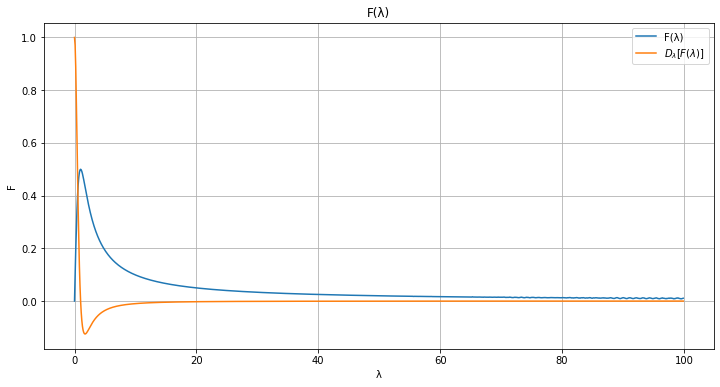

In [83]:
plt.figure(figsize=(12,6))
plt.plot(λ, y, label = 'F(λ)')
plt.plot(λ, D(λ), label = '$D_λ[F(λ)]$')
plt.title("F(λ)")
plt.xlabel('λ')
plt.ylabel('F')
plt.legend()
plt.grid()
plt.show()

B)
Construya una matriz aleatoria $3\times 3$ $\boldsymbol{Y}$ y genere la matrix
$$
\boldsymbol{A}=\boldsymbol{Y}^{\operatorname{T}}\boldsymbol{Y}
$$

1. Obtenga los autovalores y autovectores de $\boldsymbol{A}$ en orden ascendente en valor absoluto
1. Compruebe que los atovalores de $\boldsymbol{Y}$ corresponden a la raíz cuadrado de los autovalores de  $\boldsymbol{A}$ y explique porqué

In [95]:
np.random.seed(1001735333)
Y = np.random.randint(0, 50, (3,3))
A = Y.transpose()@Y
sp.Matrix(A)

Matrix([
[2294, 1621, 982],
[1621, 1262, 558],
[ 982,  558, 579]])

In [107]:
autval_A, autvec_A = np.linalg.eig(A)

In [ ]:
autval_A, autvec_A = np.sort(abs(autval_A), axis=None), np.sort(abs(autvec_A), axis=None)

In [ ]:
autval_Y, autvec_Y = np.linalg.eig(Y)

In [128]:
#@markdown Comprobación 
(np.sort(abs(autval_Y), axis=None) == np.sort(np.sqrt(abs(autval_A)), axis=None))

array([False, False, False])